In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import cluster
from sklearn import neighbors
from sklearn.metrics import silhouette_score
from sklearn import model_selection
from sklearn import decomposition
import xgboost as xgb
pd.set_option('display.max_colwidth', -1)
pd.options.display.float_format = '{:,.2f}'.format

In [2]:
# Set de datos
# df_in = pd.read_csv('./dataset/conjunto_de_datos_ingresos_enigh_2018_ns.csv')
df_pr = pd.read_csv('./dataset/conjunto_de_datos_gastospersona_enigh_2018_ns.csv', 
                    low_memory=False)
df_er = pd.read_csv('./dataset/conjunto_de_datos_erogaciones_enigh_2018_ns.csv',
                    low_memory=False)
df_tj = pd.read_csv('./dataset/conjunto_de_datos_gastotarjetas_enigh_2018_ns.csv',
                    low_memory=False)
# Catalogos
cat_gasto = pd.read_csv("./dataset/catalogos/gastos/gastos.csv")
cat_ero = pd.read_csv("./dataset/catalogos/erogaciones/producto.csv")
cat_tarje = pd.read_csv("./dataset/catalogos/tarjetas/gastoscontarjeta.csv")

In [3]:
cat_gasto = cat_gasto[['gastos','descripcion']].rename(columns={'gastos':'producto'})
cat_tarje = cat_tarje.rename(columns={'gastoscontarjeta':'producto'})
catalogos = pd.concat([cat_gasto, cat_tarje, cat_ero], sort=True)

In [4]:
# df = pd.concat([df_pr,df_tj], sort=False)
df_pr = df_pr[['folioviv','clave','gasto_tri', 'gas_nm_tri']]
df_tj = df_tj[['folioviv','clave','gasto', 'gasto_tri']]
df_er = df_er[['folioviv','clave','ero_tri']]

# df_tj.head()

In [5]:
df_pr.loc[:,'gasto_tri'] = pd.to_numeric(df_pr.gasto_tri, errors='coerce', downcast='float')
df_pr.loc[:,'gas_nm_tri'] = pd.to_numeric(df_pr.gas_nm_tri, errors='coerce', downcast='float')

df_tj.loc[:,'gasto'] = pd.to_numeric(df_tj.gasto, errors='coerce', downcast='float')
df_tj.loc[:,'gasto_tri'] = pd.to_numeric(df_tj.gasto_tri, errors='coerce', downcast='float')

df_er.loc[:,'ero_tri'] = pd.to_numeric(df_er.ero_tri, errors='coerce', downcast='float')

In [6]:
print("Gasto personal")
print(df_pr.isnull().sum())
print("Gasto con tarjeta")
print(df_tj.isnull().sum())
print("Erogaciones financieras")
print(df_er.isnull().sum())

Gasto personal
folioviv      0     
clave         0     
gasto_tri     75013 
gas_nm_tri    313763
dtype: int64
Gasto con tarjeta
folioviv     0
clave        0
gasto        0
gasto_tri    0
dtype: int64
Erogaciones financieras
folioviv    0  
clave       0  
ero_tri     612
dtype: int64


In [7]:
df_pr['gasto_tri'] = df_pr.gasto_tri.fillna(0)
df_pr['gas_nm_tri'] = df_pr.gas_nm_tri.fillna(0)

df_pr['gasto_tri'] = [x[3] if x[2] == 0 else x[2] for x in df_pr.values]

In [8]:
df_pr.drop(['gas_nm_tri'], axis=1, inplace=True)
df_tj.drop(['gasto_tri'], axis=1, inplace=True)
df_pr['folioviv'] = df_pr.folioviv.astype(str)
df_tj['folioviv'] = df_tj.folioviv.astype(str)

In [9]:
# df_pr.merge(df_tj, on='folioviv')
df = pd.concat([df_pr, df_tj, df_er], sort=False)
df.gasto_tri.fillna(0, inplace=True)
df.gasto.fillna(0, inplace=True)
df.ero_tri.fillna(0, inplace=True)
df['gasto'] = df.gasto_tri + df.gasto + df.ero_tri

## Generalizaciones de gastos ##

In [10]:
df.replace(['A001','A002','A003','A004','A005','A006','A007','A008','A009','A010','A011','A012','A013','A014','A015',
            'A016','A017','A018','A019','A020','A021','A022','A023','A024','A025','A026','A027','A028','A029','A030',
            'A031','A032','A033','A034','A035','A036','A037','A038','A039','A040','A041','A042','A043','A044','A045',
            'A046','A047','A048','A049','A050','A051','A052','A053','A054','A055','A056','A057','A058','A059','A060',
            'A061','A062','A063','A064','A065','A066','A067','A068','A069','A070','A071','A072','A073','A074','A075',
            'A076','A077','A078','A079','A080','A081','A082','A083','A084','A085','A086','A087','A088','A089','A090',
            'A091','A092','A093','A094','A095','A096','A097','A098','A099','A100','A101','A102','A103','A104','A105',
            'A106','A107','A108','A109','A110','A111','A112','A113','A114','A115','A116','A117','A118','A119','A120',
            'A121','A122','A123','A124','A125','A126','A127','A128','A129','A130','A131','A132','A133','A134','A135',
            'A136','A137','A138','A139','A140','A141','A142','A143','A144','A145','A146','A147','A148','A149','A150',
            'A151','A152','A153','A154','A155','A156','A157','A158','A159','A160','A161','A162','A163','A164','A165',
            'A166','A167','A168','A169','A170','A171','A172','A173','A174','A175','A176','A177','A178','A179','A180',
            'A181','A182','A183','A184','A185','A186','A187','A188','A189','A190','A191','A192','A193','A194','A195',
            'A196','A197','A198','A199','A200','A201','A202','A203','A204','A205','A206','A207','A208','A209','A210',
            'A211','A212','A213','A214','A215','A216','A217','A218','A219','A220','A221','A222','A223','A224','A225',
            'A226','A227','A228','A229','A230','A231','A232','A233','A234','A235','A236','A237','A238','A239','A240',
            'A241','A242','A243','A244','A245','A246','A247','TR01'], 'TB01', inplace=True)
df.replace(['B001','B002','B003','B004','B005','B006','B007','TR13'], 'TB13', inplace=True)
df.replace(['C001','C002','C003','C004','C005','C006','C007','C008','C009','C010','C011','C012','C013','C014','C015',
            'C016','C017','C018','C019','C020','TR02'], 'TB02', inplace=True)
df.replace(['C021','C022','C023','C024','D001','D002','D003','D004','D005','D006','D007','D008','D009','D010','D011',
            'D012','D013','D014','D015','D016','D017','D018','D019','D020','D021','D022','D023','D024','D025','D026',
            'TR03'], 'TB03', inplace=True)
df.replace(['E001','E002','E003','E004','E005','E006','E007','E008','E009','E010','E011','E012','E013','E014','E015',
            'E016','E017','E018','E019','E020','E021','E022','E023','E024','E025','E026','E027','E028','E029','E030',
            'E031','E032','E033','E034','TR04'], 'TB04', inplace=True)
df.replace(['F001','F002','F003','F004','F005','F006','F007','F008','F009','F010','F011','F012','F013','F014','G001',
            'G002','G003','G004','G005','G006','G007','G008','G009','G010','G011','G012','G013','G014','G015','G016',
            'TR05'], 'TB05', inplace=True)
df.replace(['G101','G102','G103','G104','G105','G106','R001','R002','R003','R004','R005','R006','R007','R008','R009',
            'R010','R011','R012','R013','TR07'], 'TB07', inplace=True)
# ================= VESTIMENTA ================= #
df.replace(['H001','H002','H003','H004','H005','H006','H007','H008','H009','H010','H011','H012','H013','H014','H016',
            'H017','H018','H019','H020','H022','H023','H027','H028','H029','H030','H032','H033','H036','H037','H039',
            'H040','H044','H045','H046','H048','H049','H050','H051','H052','H055','H056','H060','H067','H084','H085',
            'H086','H087','H088','H089','H090','H120','H121','H122','H123','H124','H125','H126','H127','H128','H129',
            'H130','H131','H132','H134','H135','I001','I002','I003','I004','I005','I006','I007','I008','I009','H057',
            'H109','H058','H116','H108','H061','H065','H068','H069','H115','H110','H114','H064','H072','H098','H117',
            'H063','H070','H112','H062','H071','H119','H074','H083','H059','H047','H103','H029','H030','H081','H096',
            'H102','H053','H040','H042','H041','H037','H073','TR08'], 'TB08', inplace=True)
df.replace(['I010','I011','I012','I014','I015','I016','I017','I018','I019','I020','I021','I022','I023','I024','I025',
            'I026','TR09'], 'TB09', inplace=True)
# ================= SERVICIOS MEDICOS ================= #
df.replace(['J001','J002','J003','J004','J005','J006','J007','J008','J009','J010','J011','J012','J014','J015','J016',
            'J017','J018','J019','J020','J021','J022','J023','J024','J025','J026','J027','J028','J029','J030','J031',
            'J032','J033','J034','J035','J037','J038','J039','J041','J043','J060','J061','J062','J063','J064','J065',
            'J066','J067','J068','J069','J070','J071','J072','J040','J049','J042','J057','J036','J050','J053','J045',
            'J051','J052','J058','J054','J055','J056','J047','J059','J044','J048','J013','J046','TR10'], 
            'TB10', inplace=True)
df.replace(['K001','K002','K003','K004','K005','K006','K007','K008','K009','K010','K011','K012','K013','K014','K015',
            'K016','K017','K018','K019','K020','K021','K022','K023','K024'], 'TB06', inplace=True)
df.replace(['K025','K026','K027','K028','K029','K030','K031','K032','K033','K034','K035','K036','K037','K038','K039',
            'K040','K041','K044','TR11'], 'TB11', inplace=True)
df.replace(['L001','L002','L003','L004','L005','L006','L007','L008','L009','L010','L011','L012','L013','L014','L015',
            'L016','L017','L018','L019','L020','L021','L022','L023','L024','L025','L026','L027','L028','L029','TR12'], 
            'TB12', inplace=True)
df.replace(['M001','M002','M003','M004','M005','M006','M007','M008','M009','M010','M011','M012','M013','M014','M015',
            'M016','M017','M018','TR05'], 'TB05', inplace=True)
df.replace(['N001','N002','N003','N004','N005','N006','N007','N008','N009','N010','N011','N012','N013','N014','N015',
            'N016','T902','TR14'], 'TB14', inplace=True)
df.replace(['Q006','Q007','Q008','Q009','Q010','Q011','Q012','Q013','Q014','Q015','Q016'], 'Q001', inplace=True)
df.replace(['TR15'], 'TB15', inplace=True)

In [12]:
df = df[['folioviv','clave','gasto']].groupby(['folioviv','clave']).gasto.sum().reset_index()
df = pd.pivot_table(df, values='gasto', index='folioviv', columns='clave').fillna(0)

## Identificacion de patrones ##

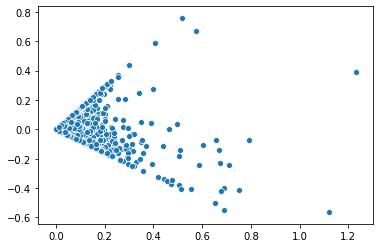

In [52]:
data = df.values

le = preprocessing.MinMaxScaler()
X = le.fit_transform(data)

model = decomposition.TruncatedSVD(n_components=2, algorithm='arpack', random_state=1)
# model = decomposition.PCA(n_components=2)
W = model.fit_transform(X)

sns.scatterplot(W[:,0], W[:,1])

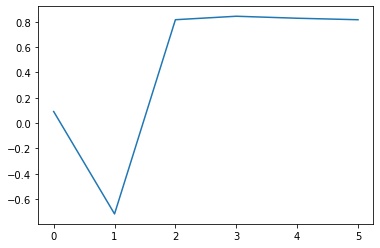

In [53]:
n_clusters = list(range(2,8))
batch = 6
size = int(W.shape[0] / 6)

ks = [cluster.MiniBatchKMeans(n_clusters=n, batch_size=batch, random_state=1) for n in n_clusters]
_ = [k.partial_fit(W[size*i : size*(i+1)]) for i,k in zip(range(batch),ks)]

score = [silhouette_score(W, k.predict(W)) for k in ks]

plt.plot(list(range(batch)), score)

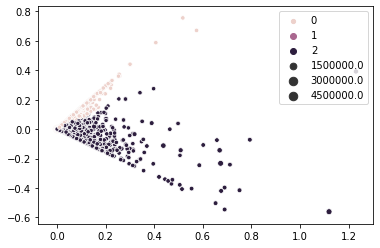

In [59]:
sns.scatterplot(W[:,0], W[:,1], hue=ks[1].predict(W), size=df.sum(axis=1).values)

In [63]:
df_vals = pd.DataFrame(columns=['ax1','ax2','hue','size'])
df_vals['ax1'] = W[:,0]
df_vals['ax2'] = W[:,1]
df_vals['hue'] = ks[1].predict(W)
df_vals['size'] = df.sum(axis=1).values

## Limpieza de valores atipicos superiores e inferiores ##

In [100]:
c0_upper = df_vals.query("hue == 0").quantile(q=0.75)[3]
c0_lower = df_vals.query("hue == 0").quantile(q=0.25)[3]

c1_upper = df_vals.query("hue == 1").quantile(q=0.75)[3]
c1_lower = df_vals.query("hue == 1").quantile(q=0.25)[3]

c2_upper = df_vals.query("hue == 2").quantile(q=0.75)[3]
c2_lower = df_vals.query("hue == 2").quantile(q=0.25)[3]

c0 = df_vals.query("hue == 0 & size > @c0_lower & size < @c0_upper").index
c1 = df_vals.query("hue == 1 & size > @c1_lower & size < @c1_upper").index
c2 = df_vals.query("hue == 2 & size > @c2_lower & size < @c2_upper").index

df = df.iloc[c0 | c1 | c2]